Assignment 2 - Car Price Prediction

In [1]:
!pip install mlflow

In [16]:
# experiment tracking
import mlflow
import os

# sets up MLflow tracking
mlflow.set_tracking_uri("http://localhost:5000")

# set this environ["LOGNAME"] to your name.
os.environ["LOGNAME"] = "supipi"

# mlflow.create_experiment(name="chaky-diabetes-example")  #create if you haven't create
mlflow.set_experiment(experiment_name="supipi-st126489-a2-v1")

2025/09/13 21:06:55 INFO mlflow.tracking.fluent: Experiment with name 'supipi-st126489-a2-v1' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///d:/AIT - Supipi/ML/Assignment 2 - Test/code/mlruns/2', creation_time=1757772415770, experiment_id='2', last_update_time=1757772415770, lifecycle_stage='active', name='supipi-st126489-a2-v1', tags={}>

## Task 1. Preparing the datasets

In [17]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from time import time
warnings.filterwarnings('ignore')

In [18]:
import matplotlib
np.__version__, pd.__version__, matplotlib.__version__

('2.2.6', '2.2.3', '3.9.2')

#### Experiment Tracking

### 01. Load dataset

In [23]:
df = pd.read_csv('dataset/Cars.csv')

In [24]:
# print the first rows of data
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0


In [13]:
# Check the shape of data
df.shape

(8128, 13)

In [25]:
# For the feature fuel, remove all rows with CNG and LPG due to different mileage system
# Remove rows where fuel is CNG or LPG
df = df[~df['fuel'].isin(['CNG', 'LPG'])]

# Check the shape of data after the changes
df.shape

(8033, 13)

In [26]:
# Remove "kmpl" in feature "mileage" and convert to float
df['mileage'] = df['mileage'].str.split().str[0].astype(float)

# Remove "CC” in feature "engine" and convert to float
df['engine'] = df['engine'].str.split().str[0].astype(float)

# Remove "bhp" in max_power and convert to float
df['max_power'] = df['max_power'].str.split().str[0].astype(float)

df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [16]:
# Statistical info about data after converting few features from string to float
df.describe()

,year,selling_price,km_driven,mileage,engine,max_power,seats
count,8033.000000,8.033000e+03,8.033000e+03,7819.000000,7819.000000,7825.000000,7819.000000
mean,2013.818748,6.427361e+05,6.973882e+04,19.390375,1463.090677,91.864733,5.421281
std,4.031655,8.098635e+05,5.664361e+04,4.001777,504.655439,35.846839,0.962876
min,1983.000000,2.999900e+04,1.000000e+03,0.000000,624.000000,0.000000,2.000000
25%,2011.000000,2.600000e+05,3.500000e+04,16.780000,1197.000000,69.000000,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,19.300000,1248.000000,82.400000,5.000000
75%,2017.000000,6.800000e+05,9.800000e+04,22.320000,1582.000000,102.000000,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,42.000000,3604.000000,400.000000,14.000000


In [17]:
# Check data types of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   object 
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(4), int64(3), object(6)
memory usage: 878.6+ KB


In [27]:
#  For the feature owner, map First owner to 1, ..., Test Drive Car to 5
owner_mapping = {
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4,
    "Test Drive Car": 5
}

# Apply mapping
df["owner"] = df["owner"].map(owner_mapping)

In [19]:
# print the first rows of data
df.head()


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [20]:
# Check data types of input data
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8033 entries, 0 to 8127
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8033 non-null   object 
 1   year           8033 non-null   int64  
 2   selling_price  8033 non-null   int64  
 3   km_driven      8033 non-null   int64  
 4   fuel           8033 non-null   object 
 5   seller_type    8033 non-null   object 
 6   transmission   8033 non-null   object 
 7   owner          8033 non-null   int64  
 8   mileage        7819 non-null   float64
 9   engine         7819 non-null   float64
 10  max_power      7825 non-null   float64
 11  torque         7819 non-null   object 
 12  seats          7819 non-null   float64
dtypes: float64(4), int64(4), object(5)
memory usage: 878.6+ KB


In [21]:
# Check the column names
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque',
       'seats'],
      dtype='object')

### 02. Exploratory Data Analysis

Rename columns

In [28]:
# Rename the column for feature "name" with "brand", because it makes a sense
df.rename(columns = {'name':'brand'}, inplace = True)

In [29]:
print(df.columns.tolist())

df.head()

['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type', 'transmission', 'owner', 'mileage', 'engine', 'max_power', 'torque', 'seats']


,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


In [30]:
df.dtypes

brand             object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner              int64
mileage          float64
engine           float64
max_power        float64
torque            object
seats            float64
dtype: object

Univariant Analysis

In [31]:
# check number of unique brands in the dataset
df["brand"].nunique()

2018

In [32]:
# print unique brands in the dataset
df["brand"].unique()

array(['Maruti Swift Dzire VDI', 'Skoda Rapid 1.5 TDI Ambition',
       'Honda City 2017-2020 EXi', ..., 'Tata Nexon 1.5 Revotorq XT',
       'Ford Freestyle Titanium Plus Diesel BSIV',
       'Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV'],
      shape=(2018,), dtype=object)

In [33]:
# For car brands, take only the first word and remove the rest
df['brand'] = df['brand'].str.split().str[0]

In [34]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,190Nm@ 2000rpm,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,250Nm@ 1500-2500rpm,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,22.4 kgm at 1750-2750rpm,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,"11.5@ 4,500(kgm@ rpm)",5.0


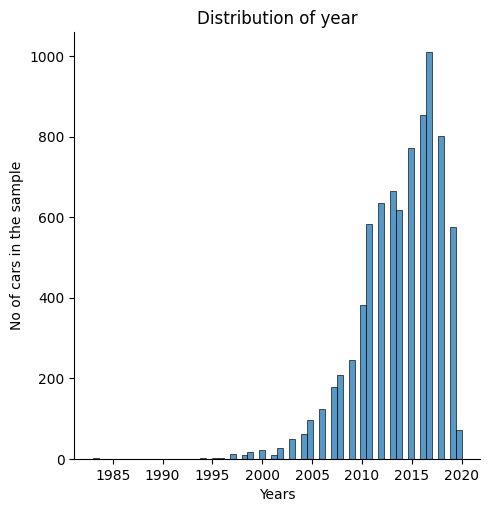

In [23]:
# Explore range of years related to cars in the dataset
sns.displot(data = df, x = 'year')
# Add labels
plt.xlabel("Years")
plt.ylabel("No of cars in the sample")
plt.title("Distribution of year")

plt.show()

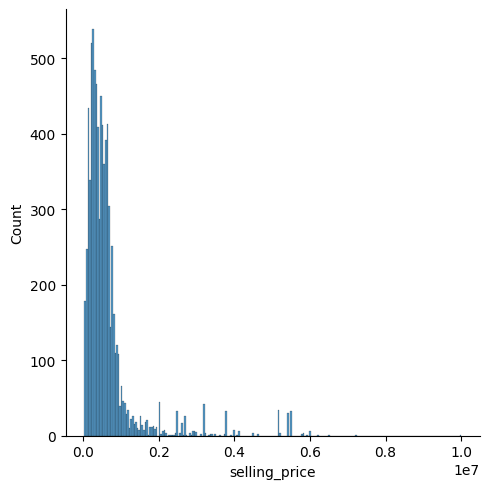

In [24]:
# Explore the distribution of car seling price across the dataset
sns.displot(data = df, x = 'selling_price')

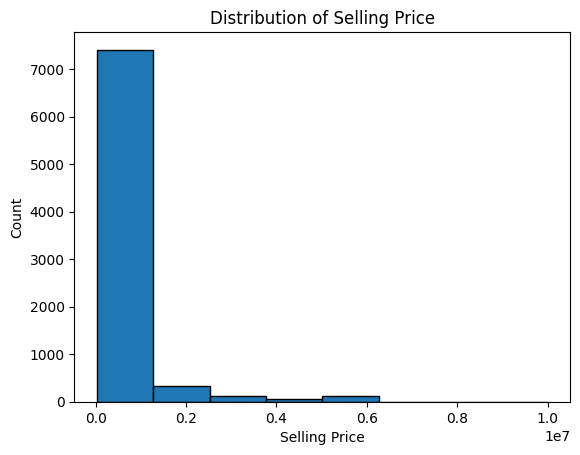

In [25]:
# For clear visualization, plot histogram for "selling_price" with 8 bins
plt.hist(df["selling_price"], bins=8, edgecolor="black")

# Add labels
plt.xlabel("Selling Price")
plt.ylabel("Count")
plt.title("Distribution of Selling Price")

plt.show()

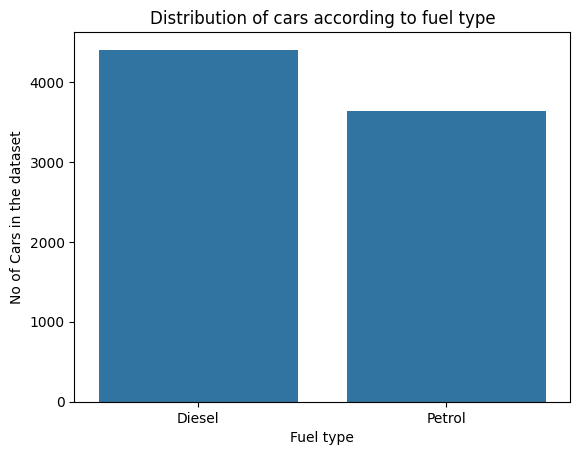

In [26]:
# Explore the distribution of cars in the dataset according to the fuel type across the dataset
sns.countplot(data = df, x = 'fuel')

# Add labels
plt.xlabel("Fuel type")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to fuel type")

plt.show()

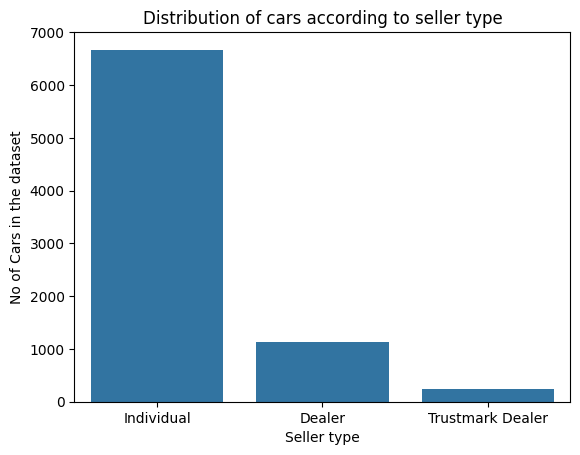

In [27]:
# Explore the distribution of cars in the dataset according to the seller type across the dataset
sns.countplot(data = df, x = 'seller_type')

# Add labels
plt.xlabel("Seller type")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to seller type")

plt.show()

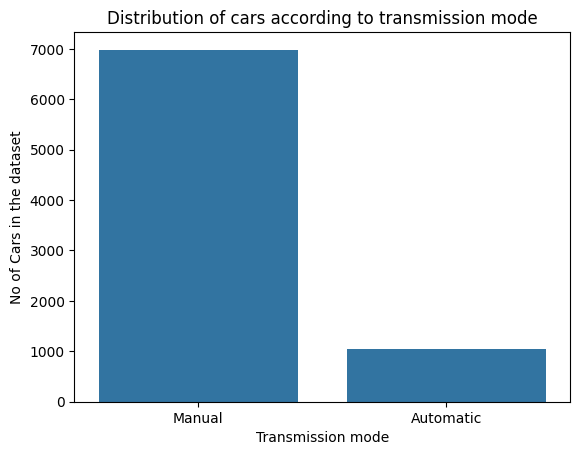

In [28]:
# Explore the distribution of cars in the dataset according to the transmission type across the datasetS
sns.countplot(data = df, x = 'transmission')

# Add labels
plt.xlabel("Transmission mode")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to transmission mode")

plt.show()



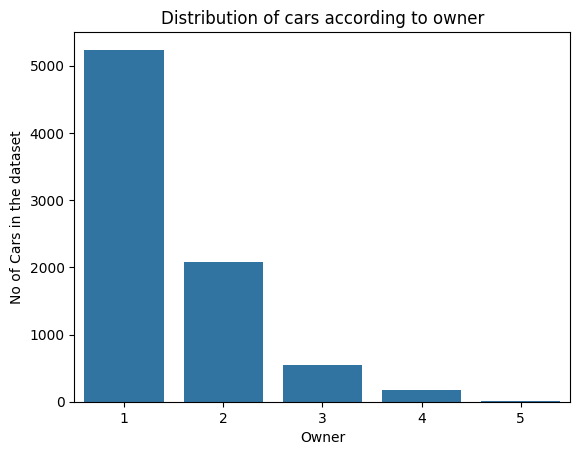

In [29]:
# Explore the distribution of cars in the dataset according to the owner type across the dataset
sns.countplot(data = df, x = 'owner')

# Add labels
plt.xlabel("Owner")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to owner")

plt.show()


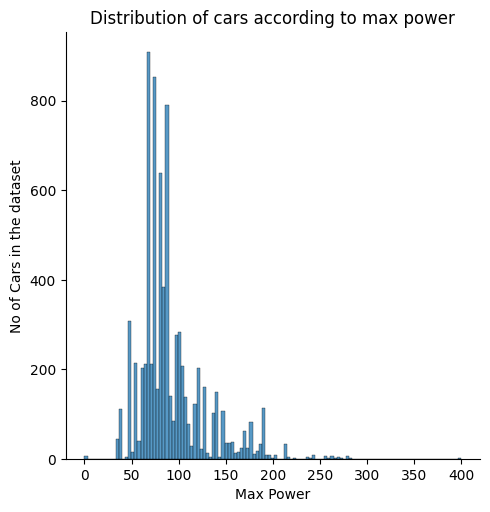

In [30]:
sns.displot(data = df, x = "max_power")

# Add labels
plt.xlabel("Max Power")
plt.ylabel("No of Cars in the dataset")
plt.title("Distribution of cars according to max power")

plt.show()

Multivariant Analysis

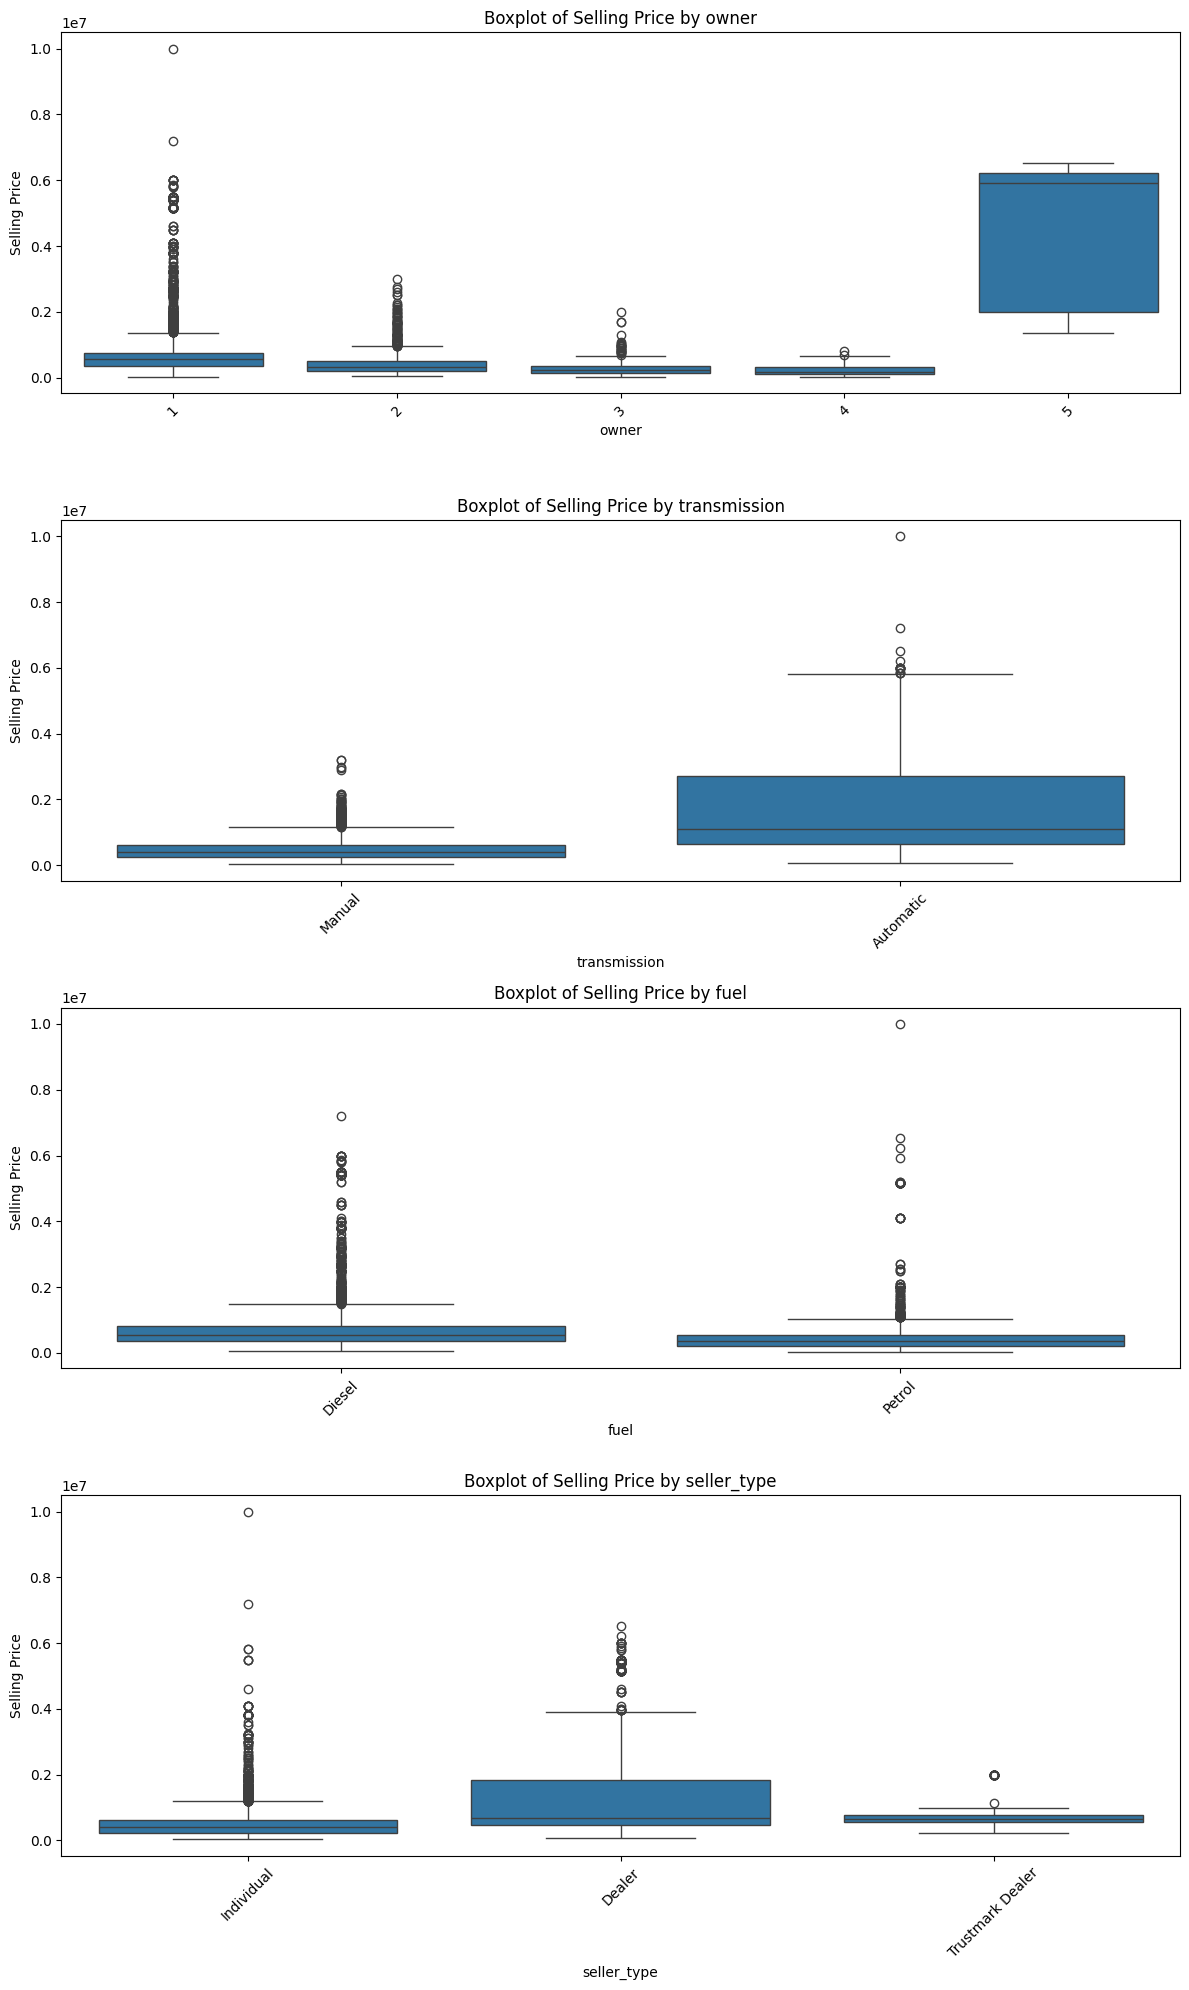

In [31]:
# Explore the relationship between categorical features and selling price using boxplots

import matplotlib.pyplot as plt
import seaborn as sns

# List of categorical features to plot
cat_cols = ["owner", "transmission", "fuel", "seller_type"]

# Set up subplot grid
rows = len(cat_cols)
fig, axes = plt.subplots(rows, 1, figsize=(12, rows * 5))  
axes = axes.flatten()

# Iterate through categorical columns and plot boxplots
for i, col in enumerate(cat_cols):
    sns.boxplot(x=df[col], y=df["selling_price"], ax=axes[i])
    axes[i].set_title(f"Boxplot of Selling Price by {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Selling Price")
    axes[i].tick_params(axis='x', rotation=45)

# Remove unused subplot spaces
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


<Axes: xlabel='year', ylabel='selling_price'>

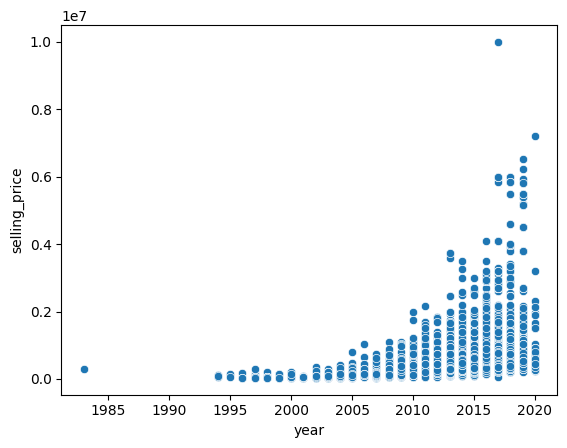

In [32]:
# Explorethe selling price of sample dataset with respect to the year of car manufacturing
sns.scatterplot(x = df['year'], y = df['selling_price'])

<Axes: xlabel='year', ylabel='selling_price'>

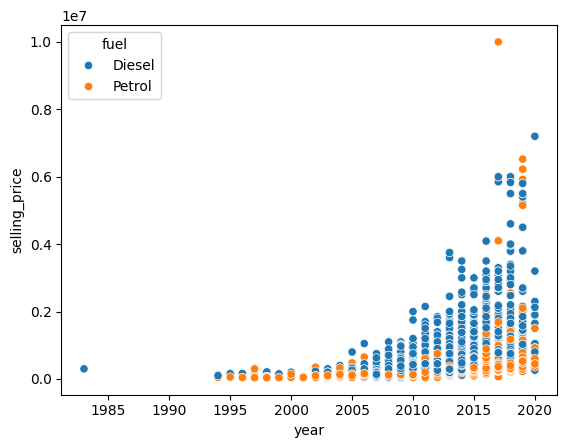

In [33]:
# Explorethe selling price of sample dataset with respect to the year of car manufacturing and fuel type
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['fuel'])

<Axes: xlabel='year', ylabel='selling_price'>

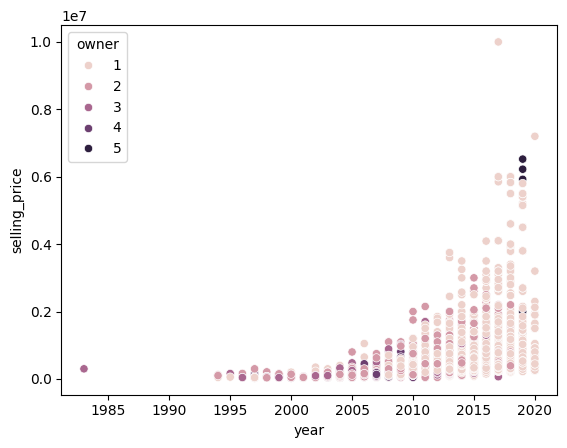

In [34]:
# Explorethe selling price of sample dataset with respect to the year of car manufacturing and owner type
sns.scatterplot(x = df['year'], y = df['selling_price'], hue=df['owner'])

<Axes: xlabel='mileage', ylabel='selling_price'>

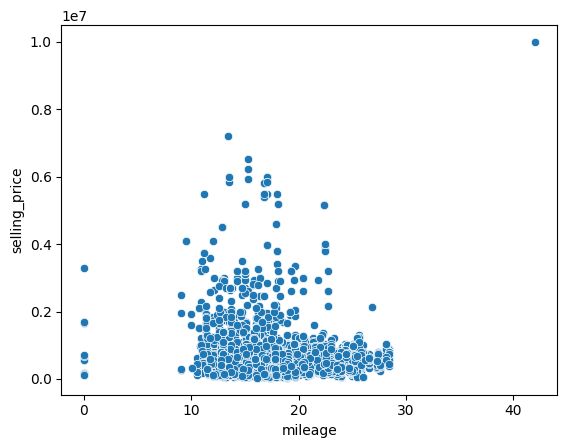

In [35]:
# Explorethe selling price of sample dataset with respect to the mileage of cars
sns.scatterplot(x = df['mileage'], y = df['selling_price'])

Correlation Matrix

Explore strong factors predicting the car price and checking whether certain features are too correlated

In [35]:
# drop the column because Chaky’s company does not understand well about it
df = df.drop('torque', axis='columns')

In [36]:
df.head()

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Individual,Manual,1,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Individual,Manual,2,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Individual,Manual,3,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Individual,Manual,1,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Individual,Manual,1,16.10,1298.0,88.20,5.0


Label Encoding

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
unique_values = df['brand'].unique()
print("Unique attributes in 'brand':", unique_values)

Unique attributes in 'brand': ['Maruti' 'Skoda' 'Honda' 'Hyundai' 'Toyota' 'Ford' 'Renault' 'Mahindra'
 'Tata' 'Chevrolet' 'Fiat' 'Datsun' 'Jeep' 'Mercedes-Benz' 'Mitsubishi'
 'Audi' 'Volkswagen' 'BMW' 'Nissan' 'Lexus' 'Jaguar' 'Land' 'MG' 'Volvo'
 'Daewoo' 'Kia' 'Force' 'Ambassador' 'Ashok' 'Isuzu' 'Opel' 'Peugeot']


In [39]:
# one hot encoding better when there are less than 4 - 5 unique features in the column.
# as 'brand' column has 32 unique values, label encoding will be applied

# label encoding for 'brand' column
le = LabelEncoder()
df["brand"] = le.fit_transform(df["brand"])

df["brand"].unique()


array([20, 27, 10, 11, 29,  9, 26, 19, 28,  4,  7,  6, 14, 21, 22,  2, 30,
        3, 23, 17, 13, 16, 18, 31,  5, 15,  8,  0,  1, 12, 24, 25])

In [40]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Ambassador', 'Ashok', 'Audi', 'BMW', 'Chevrolet', 'Daewoo',
       'Datsun', 'Fiat', 'Force', 'Ford', 'Honda', 'Hyundai', 'Isuzu',
       'Jaguar', 'Jeep', 'Kia', 'Land', 'Lexus', 'MG', 'Mahindra',
       'Maruti', 'Mercedes-Benz', 'Mitsubishi', 'Nissan', 'Opel',
       'Peugeot', 'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen',
       'Volvo'], dtype=object)

In [41]:
# label encoding for 'fuel'
le = LabelEncoder()
df["fuel"] = le.fit_transform(df["fuel"])

df["fuel"].unique()


array([0, 1])

In [42]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Diesel', 'Petrol'], dtype=object)

In [43]:
# then we can try transform
le.transform(["Diesel", "Petrol"])

array([0, 1])

In [44]:
df["seller_type"].unique()

array(['Individual', 'Dealer', 'Trustmark Dealer'], dtype=object)

In [45]:
df["seller_type"].value_counts()

seller_type
Individual          6673
Dealer              1124
Trustmark Dealer     236
Name: count, dtype: int64

In [46]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Column to encode
col_to_encode = ["seller_type"]

# Initialize encoder
encoder = OneHotEncoder(drop="first", handle_unknown="ignore")

# Fit & transform on the dataset
encoded = encoder.fit_transform(df[col_to_encode])

# Convert back to DataFrame
encoded_df = pd.DataFrame(encoded.toarray(),
                          columns=encoder.get_feature_names_out(col_to_encode),
                          index=df.index)

# Drop original column and join encoded columns
df = pd.concat([df.drop(col_to_encode, axis=1), encoded_df], axis=1)

df.head()




,brand,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats,seller_type_Individual,seller_type_Trustmark Dealer
0,20,2014,450000,145500,0,Manual,1,23.40,1248.0,74.00,5.0,1.0,0.0
1,27,2014,370000,120000,0,Manual,2,21.14,1498.0,103.52,5.0,1.0,0.0
2,10,2006,158000,140000,1,Manual,3,17.70,1497.0,78.00,5.0,1.0,0.0
3,11,2010,225000,127000,0,Manual,1,23.00,1396.0,90.00,5.0,1.0,0.0
4,20,2007,130000,120000,1,Manual,1,16.10,1298.0,88.20,5.0,1.0,0.0


In [48]:
df.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'transmission',
       'owner', 'mileage', 'engine', 'max_power', 'seats',
       'seller_type_Individual', 'seller_type_Trustmark Dealer'],
      dtype='object')

In [47]:
# label encoding for 'transmission'
le = LabelEncoder()
df["transmission"] = le.fit_transform(df["transmission"])

df["transmission"].unique() 

array([1, 0])

In [48]:
# we can call le.classes_ to know what it maps to
le.classes_

array(['Automatic', 'Manual'], dtype=object)

In [49]:

le.transform(["Manual", "Automatic"])

array([1, 0])

In [50]:
# According to EDA for owner attribue VS selling price done above, Test Drive Cars are ridiculously expensive. 
# Since we do not want to involve this, we will simply delete all samples related to it.
df = df[df['owner'] != 5]


In [51]:
df.shape

(8028, 13)

<Axes: >

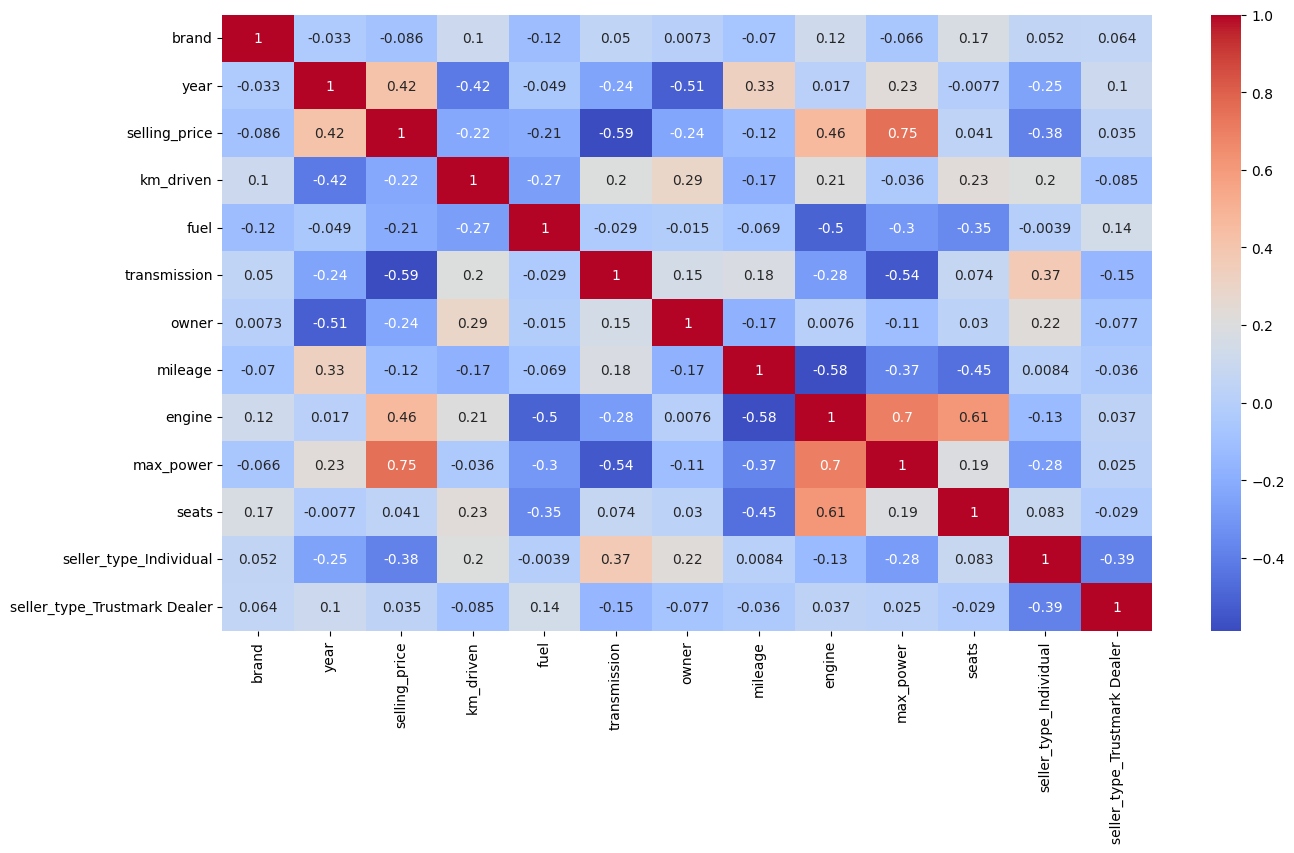

In [52]:
# Let's check out heatmap
plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")  


#### 03. Feature Selection

In [53]:
#x is our strong features

X = df[['transmission','max_power']]

#y is simply the life expectancy col
y = df["selling_price"]

In [56]:
X.head()

,transmission,max_power
0,1,74.00
1,1,103.52
2,1,78.00
3,1,90.00
4,1,88.20


Train test split

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

#### 04. Preprocessing

In [57]:
# check null values

#check for null values
X_train[['transmission','max_power']].isna().sum()

transmission      0
max_power       149
dtype: int64

In [58]:
X_test[['transmission','max_power']].isna().sum()

transmission     0
max_power       59
dtype: int64

In [60]:
y_train.isna().sum()

np.int64(0)

In [61]:
y_test.isna().sum()

np.int64(0)

In [55]:
import pickle

# calculate defaults for missing values
mean_max_power = X_train["max_power"].mean()
median_max_power = X_train["max_power"].median()

#  Categorical feature defaults (transmission ratio)
transmission_counts = X_train["transmission"].value_counts(normalize=True).to_dict()

# Save defaults
defaults = {
    "mean_max_power": mean_max_power,
    "median_max_power": median_max_power,
    "transmission_ratio": transmission_counts
}

with open("defaults.pkl", "wb") as f:
    pickle.dump(defaults, f)

print("Defaults saved:", defaults)


Defaults saved: {'mean_max_power': np.float64(92.04935009140767), 'median_max_power': np.float64(82.4), 'transmission_ratio': {1: 0.8651005516995907, 0: 0.1348994483004093}}


In [56]:
## if numbers -->  average | median | regression results | 0
## if categories --> mode     |  ratio    | “No category”

#let's fill the training set first!
X_train['max_power'].fillna(X_train['max_power'].median(), inplace=True)

In [57]:
#let's fill the testing set
X_test['max_power'].fillna(X_test['max_power'].median(), inplace=True)

In [58]:
#check again
X_train[['transmission','max_power']].isna().sum()

transmission    0
max_power       0
dtype: int64

In [59]:
X_test[['transmission','max_power']].isna().sum()

transmission    0
max_power       0
dtype: int64

In [60]:
y_train.isna().sum(), y_test.isna().sum()

(np.int64(0), np.int64(0))

Checking Outliers

In [50]:
def outlier_count(col, data = X_train):
    
    # calculate your 25% quatile and 75% quatile
    q75, q25 = np.percentile(data[col], [75, 25])
    
    # calculate your inter quatile
    iqr = q75 - q25
    
    # min_val and max_val
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    # count number of outliers, which are the data that are less than min_val or more than max_val calculated above
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    
    # calculate the percentage of the outliers
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    
    if(outlier_count > 0):
        print("\n"+15*'-' + col + 15*'-'+"\n")
        print('Number of outliers: {}'.format(outlier_count))
        print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [51]:
for col in X_train.columns:
    outlier_count(col)


---------------transmission---------------

Number of outliers: 758
Percent of data that is outlier: 13.49%

---------------max_power---------------

Number of outliers: 409
Percent of data that is outlier: 7.28%


Scalling

#StandardScaler is usually used for continuous values
#transmission is categorical
#standardizing it will lose the category, so it will not be done here

In [61]:
# Scale only the second column
scaler = StandardScaler()
X_train.iloc[:, 1] = scaler.fit_transform(X_train.iloc[:, [1]])
X_test.iloc[:, 1]  = scaler.transform(X_test.iloc[:, [1]])

In [53]:
X_train.head(3)

,transmission,max_power
6853,1,-0.547545
1495,1,-0.838350
7904,1,-0.085646


In [54]:
X_test.head(3)

,transmission,max_power
5948,1,-0.050636
6039,1,0.971416
3069,1,-0.698877


In [73]:
# no fo features
n = X_train.shape[1]
n

2

#### 05. Model Selection

In [62]:
#Since selling price is a big number, transform the label using log transform,
y_train = np.log(y_train)
y_train.head()

6853    12.980800
1495    12.899220
7904    13.122363
1281    12.154779
1421    12.278393
Name: selling_price, dtype: float64

In [56]:
# Let's check shapes of all X_train, X_test, y_train, y_test
print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ", y_train.shape)
print("Shape of y_test: ", y_test.shape)

Shape of X_train:  (5619, 2)
Shape of X_test:  (2409, 2)
Shape of y_train:  (5619,)
Shape of y_test:  (2409,)


Modeling

Car price prediction with LinearRegression

## Replace Model with LinearRegression Class

In [63]:
# add intercept to the dataset

# X = np.insert(X, 0, 1, axis=1)
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)

In [77]:
y_train = y_train.to_numpy()

#### Linear Regression Class

In [78]:
n = X_train.shape[1] 
n

3

In [79]:
X_train[0]

array([ 1.        ,  1.        , -0.54754542])

In [80]:
X_train[10]

array([1.        , 1.        , 0.24863884])

In [ ]:
from sklearn.model_selection import KFold
import numpy as np
import mlflow


class LinearRegression(object):
    
  
    kfold = KFold(n_splits=3)

    # extract number of features in X_train
    n = X_train.shape[1]  
     
    def __init__(self, regularization, weight_init, lr, method, use_momentum, num_epochs=200, batch_size=50, cv=kfold, 
                 n_features = n, momentum=0.9, prev_step=0,**kwargs):
        self.lr         = lr
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.method     = method
        self.cv         = cv
        self.n_features = n_features
        self.regularization = regularization
        self.weight_init = weight_init
        self.use_momentum = use_momentum
        self.momentum = momentum
        self.prev_step = prev_step

    # function to initialize the weights for parameters
    def initialize_weight(self, n_features, weight_init):
        #print(weight_init)
        if weight_init == "zeros":
            return np.zeros(n_features)
        elif weight_init == "xavier":
            lower, upper = -(1.0/np.sqrt(n_features)), (1.0/np.sqrt(n_features))
            numbers = np.random.rand(n_features)  
            scaled = lower + numbers * (upper - lower)
            return scaled
        else:
            raise ValueError("Initialization method is not known")

    def mse(self, ytrue, ypred):
        ytrue = np.atleast_1d(ytrue)
        ypred = np.atleast_1d(ypred)
        return ((ypred - ytrue) ** 2).sum() / ytrue.shape[0]

    # function to calculate r2 score
    def r2(self, ytrue, ypred):
        ss_res = ((ytrue - ypred) ** 2).sum()     # residual sum of squares
        ss_tot = ((ytrue - ytrue.mean()) ** 2).sum()  # total sum of squares
        return 1 - (ss_res / ss_tot)

    def fit(self, X_train, y_train):
        # store per-fold results
        self.kfold_val_mse = []
        self.kfold_val_r2 = []
        self.val_loss_old = np.inf

        #print("in fit",self.weight_init)

        for fold, (train_idx, val_idx) in enumerate(self.cv.split(X_train)):
            X_cross_train = X_train[train_idx]
            y_cross_train = y_train[train_idx]
            X_cross_val   = X_train[val_idx]
            y_cross_val   = y_train[val_idx]
            #print("in fold",self.weight_init)
            
            # initialize weights for theta
            self.theta = self.initialize_weight(X_cross_train.shape[1], self.weight_init)

            for epoch in range(self.num_epochs):
                # shuffle training data
                perm = np.random.permutation(X_cross_train.shape[0])
                X_cross_train = X_cross_train[perm]
                y_cross_train = y_cross_train[perm]

                # training step depending on method
                if self.method == 'stochastic':
                    for batch_idx in range(X_cross_train.shape[0]):
                        X_method_train = X_cross_train[batch_idx].reshape(1, -1)
                        y_method_train = y_cross_train[batch_idx:batch_idx+1]
                        train_loss = self._train(X_method_train, y_method_train)

                elif self.method == 'mini-batch':
                    for batch_idx in range(0, X_cross_train.shape[0], self.batch_size):
                        X_method_train = X_cross_train[batch_idx:batch_idx+self.batch_size, :]
                        y_method_train = y_cross_train[batch_idx:batch_idx+self.batch_size]
                        train_loss = self._train(X_method_train, y_method_train)
                else:
                    X_method_train = X_cross_train
                    y_method_train = y_cross_train
                    train_loss = self._train(X_method_train, y_method_train)

                # log training loss
                mlflow.log_metric(key=f"train_loss_fold{fold}", value=train_loss, step=epoch)

                # validation metrics
                yhat_val = self.predict(X_cross_val)
                val_loss_new = self.mse(y_cross_val, yhat_val)
                val_r2_new = self.r2(y_cross_val, yhat_val)

                # log validation metrics per fold
                mlflow.log_metric(key=f"val_mse_fold{fold}", value=val_loss_new, step=epoch)
                mlflow.log_metric(key=f"val_r2_fold{fold}", value=val_r2_new, step=epoch)

                # early stopping
                if np.allclose(val_loss_new, self.val_loss_old):
                    break
                self.val_loss_old = val_loss_new

            # store final validation metrics for this fold
            self.kfold_val_mse.append(val_loss_new)
            self.kfold_val_r2.append(val_r2_new)

            print(f"Fold {fold}: val_mse={val_loss_new:.4f}, val_r2={val_r2_new:.4f}")

        # log average validation metrics across folds
        mean_val_mse = np.mean(self.kfold_val_mse)
        mean_val_r2 = np.mean(self.kfold_val_r2)

        mlflow.log_metric("mean_val_mse", mean_val_mse)
        mlflow.log_metric("mean_val_r2", mean_val_r2)

        print(f"Average Cross Validation Results → val_mse={mean_val_mse:.4f}, val_r2={mean_val_r2:.4f}")

    # update theta
    def update(self, grad):
        if self.use_momentum:
            step = self.lr * grad
            self.theta = self.theta - step + self.momentum * self.prev_step
            self.prev_step = step
        else:
            self.theta = self.theta - self.lr * grad

    def _train(self, X, y):
        yhat = self.predict(X)
        m    = X.shape[0]        
        grad = (1/m) * X.T @(yhat - y) + self.regularization.derivation(self.theta)
        self.update(grad)
        return self.mse(y, yhat)

    def predict(self, X):
        return X @ self.theta  # (m, n) @ (n, )

    def _coef(self):
        return self.theta[1:]  # w1...wn

    def _bias(self):
        return self.theta[0]   # w0


Now, create `Ridge`, `Lasso` and `Elastic` class that extends the `LinearRegression`, with added penalty.

In [95]:
from sklearn.preprocessing import PolynomialFeatures
#from sklearn.linear_model import LinearRegression

In [ ]:
# for normal regression
class NoPenalty:
    def __call__(self, theta):
        return 0
    
    def derivation(self, theta):
        return 0
    

class LassoPenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta):
        return self.l * np.sum(np.abs(theta))
        
    def derivation(self, theta):
        return self.l * np.sign(theta)
    

class RidgePenalty:
    def __init__(self, l):
        self.l = l
        
    def __call__(self, theta):
        return self.l * np.sum(np.square(theta))
        
    def derivation(self, theta):
        return self.l * 2 * theta
    

class ElasticPenalty:
    def __init__(self, l=0.1, l_ratio=0.5):
        self.l = l 
        self.l_ratio = l_ratio

    def __call__(self, theta):
        l1_contribution = self.l_ratio * self.l * np.sum(np.abs(theta))
        l2_contribution = (1 - self.l_ratio) * self.l * 0.5 * np.sum(np.square(theta))
        return l1_contribution + l2_contribution

    def derivation(self, theta):
        l1_derivation = self.l * self.l_ratio * np.sign(theta)
        l2_derivation = self.l * (1 - self.l_ratio) * theta
        return l1_derivation + l2_derivation


# Regression Models 


class NormalRegression(LinearRegression):
    def __init__(self, method, lr, weight_init, use_momentum, l):
        self.regularization = NoPenalty()
        super().__init__(self.regularization,weight_init,lr,method,use_momentum)


class Lasso(LinearRegression):
    def __init__(self, method, lr, weight_init, use_momentum, l):
        self.regularization = LassoPenalty(l)
        super().__init__(self.regularization,weight_init,lr,method,use_momentum)
    

class Ridge(LinearRegression):
    def __init__(self, method, lr, weight_init, use_momentum, l):
        #print("Ridge",weight_init)
        self.regularization = RidgePenalty(l)
        super().__init__(self.regularization,weight_init,lr,method,use_momentum)


class ElasticNet(LinearRegression):
    def __init__(self, method, lr, weight_init, use_momentum, l, l_ratio=0.5):
        self.regularization = ElasticPenalty(l, l_ratio)
        super().__init__(self.regularization,weight_init,lr,method,use_momentum)

class PolynomialRegression(LinearRegression):
    def __init__(self, method, lr, weight_init, use_momentum, l, degree=2):
        self.degree = degree
        self.regularization = NoPenalty()
        super().__init__(self.regularization,weight_init,lr,method,use_momentum)
        self.poly = PolynomialFeatures(degree=self.degree, include_bias=False)

    def fit(self, X, y, *args, **kwargs):
        X_poly = self.poly.fit_transform(X)
        return super().fit(X_poly, y, *args, **kwargs)

    def predict(self, X):
        n_expected_raw = self.poly.n_features_in_
        if X.shape[1] == n_expected_raw:
            X_poly = self.poly.transform(X)
        else:
            X_poly = X
        return super().predict(X_poly)


#### Experiment

In [97]:
#helper function for looping classnames
import sys

def str_to_class(classname):
    return getattr(sys.modules[__name__], classname)

In [ ]:
import itertools

regs = ["Ridge", "Lasso", "PolynomialRegression","NormalRegression"]

methods = ["stochastic","mini-batch","batch"]

initial_weights = ["zeros", "xavier"]

learning_rates = [0.01, 0.001, 0.0001]

momentum = [True, False]

for reg, method, weight_init, lr, use_momentum in itertools.product( regs, methods, initial_weights, learning_rates, momentum):

    params = {
        "method": method,
        "lr": lr,
        "weight_init": weight_init,
        "use_momentum": use_momentum,
        "l": 0.1
    }

    run_name = f"reg-{reg}_method-{method}_winit-{weight_init}_lr-{lr}_momentum-{use_momentum}"

    # start mlflow experiment
    with mlflow.start_run(run_name=run_name, nested=True):

        print("="*5, run_name, "="*5)

        type_of_regression = str_to_class(reg)
        model = type_of_regression(**params)

        # train the model
        model.fit(X_train, y_train)

        mlflow.log_param("regression", reg)
        mlflow.log_params(params)
       

        signature = mlflow.models.infer_signature(X_train, model.predict(X_train))
        mlflow.sklearn.log_model(model, name="model", signature=signature)


===== reg-Ridge_method-stochastic_winit-zeros_lr-0.01_momentum-True =====
Fold 0: val_mse=4.9704, val_r2=-6.2393
Fold 1: val_mse=4.4469, val_r2=-5.1483
Fold 2: val_mse=4.6735, val_r2=-5.7300
Average Cross Validation Results → val_mse=4.6969, val_r2=-5.7059
🏃 View run reg-Ridge_method-stochastic_winit-zeros_lr-0.01_momentum-True at: http://localhost:5000/#/experiments/1/runs/f5b968a510fa4a61827fa18ff7a09926
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== reg-Ridge_method-stochastic_winit-zeros_lr-0.01_momentum-False =====
Fold 0: val_mse=4.4852, val_r2=-5.5327
Fold 1: val_mse=4.4496, val_r2=-5.1521
Fold 2: val_mse=4.2278, val_r2=-5.0883
Average Cross Validation Results → val_mse=4.3876, val_r2=-5.2577
🏃 View run reg-Ridge_method-stochastic_winit-zeros_lr-0.01_momentum-False at: http://localhost:5000/#/experiments/1/runs/6fe5e044f9834846935e5e7a27d97846
🧪 View experiment at: http://localhost:5000/#/experiments/1
===== reg-Ridge_method-stochastic_winit-zeros_lr-0.001_mom

Make experiment for Normal Regression again

#### Select the best model

In [ ]:
print(mlflow.__version__)

In [ ]:
# model with minimum mse values is taken

In [ ]:
import mlflow

# define path for the model using its model id which is taken from mlflow ui
model_path = r"D:/AIT - Supipi/ML/Assignment 2 - Test/mlruns/1/runs/m-b56e04231f68451fbb4db79e75ebe430/artifacts"
model = mlflow.pyfunc.load_model(model_path)

print("Model loaded successfully")



Model loaded successfully


In [66]:
model

mlflow.pyfunc.loaded_model:
  artifact_path: file:///D:/AIT - Supipi/ML/Assignment 2 - Test/mlruns/1/models/m-b56e04231f68451fbb4db79e75ebe430/artifacts
  flavor: mlflow.sklearn
  run_id: 21ed4e080009440d912e76937fa5f5ac

#### Perform prediction on the test dataset using the best model

In [68]:
from sklearn.metrics import mean_squared_error, r2_score

In [75]:
# test the model with the best parameters
yhat = model.predict(X_test)
pred_y = np.exp(yhat)


In [72]:
mean_squared_error(y_test, pred_y)

np.float64(244647159864.25888)

In [73]:
print("r2: ", r2_score(y_test, pred_y))

r2:  0.6339107993994786


#### 0.7 Analyze feature importance

Permutation way

In [11]:
import mlflow

# define path for the model using its run id which is taken from mlflow ui
model_path = r"D:/AIT - Supipi/ML/Assignment 2 - Test/mlruns/1/runs/m-b56e04231f68451fbb4db79e75ebe430/artifacts"
model = mlflow.pyfunc.load_model(model_path)



print("Model loaded successfully")

Model loaded successfully


ExactExplainer explainer: 2410it [00:11, 151.81it/s]                           


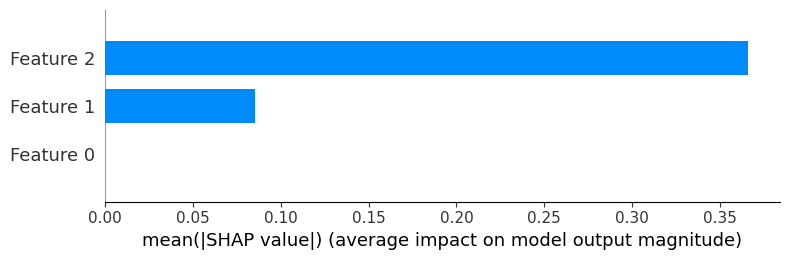

In [64]:
import shap

explainer = shap.Explainer(model.predict, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

In [72]:
# wrap MLflow model
wrapped_model = SklearnWrapper(model)

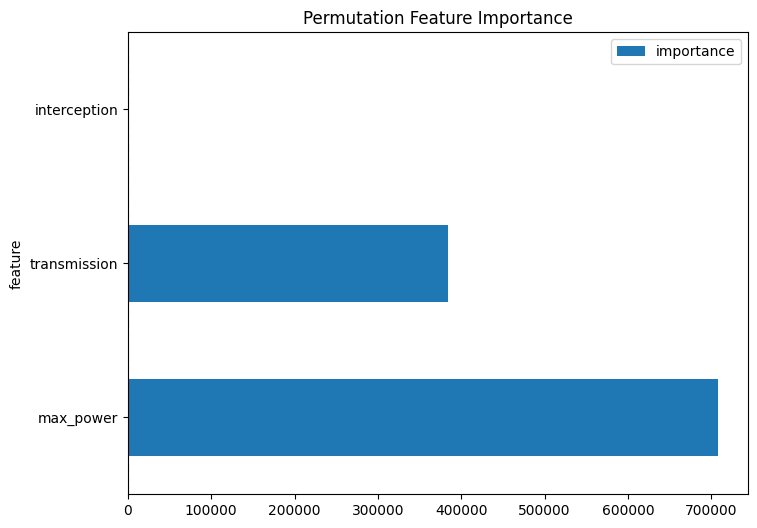

In [73]:
from sklearn.inspection import permutation_importance
import pandas as pd
import matplotlib.pyplot as plt


# your saved feature names from training
feature_names = ["interception", "transmission", "max_power"]  # replace with real ones

# run permutation importance
result = permutation_importance(
    wrapped_model, X_test, y_test,
    n_repeats=10, random_state=42, scoring="neg_mean_squared_error"
)

# put into DataFrame
importance_df = pd.DataFrame({
    "feature": feature_names,
    "importance": result.importances_mean
}).sort_values("importance", ascending=False)

# plot
importance_df.plot(kind="barh", x="feature", y="importance", figsize=(8,6))
plt.title("Permutation Feature Importance")
plt.axvline(x=0, color="gray", linestyle="--")
plt.show()


It is clear that he interception we have added for training regression model does not affect to the model performance. Ma_power is the feature which affects mostly to the model performance.

#### 08. Inference

## Discussion

#### Introduction

In this assignment, it was exprimented performance linear models for a given dataset and a defined regression model type using MLflow. There are 4 types of regression models compared including polynomial, lasso, ridge, normal.

These models were further compared with various parameter values. They are;
1. using with or without momentum
2. stochastic, mini-batch, batch
3. two intialization methods for theta; zero, xavier
4. learning rate of 0.01, 0.001, and 0.0001


As a result, 144 number of models were created in the experiment.

Following are the finding of this experiment.

#### 1. Comaprison according to  regression model type

<img src="./Screenshots/Regressions/regressions.jpg" align="left" style="width:1000px;"/>

The above image shows the mean mse and r2 error for each regression model types. There are 36 model created for each model type.

<img src="./Screenshots/Regressions/mean_val_mse.png" align="left" style="width:800px;"/>

The above fingure depicts the mean mse for each regression type. According to that Ridge Regression model type has highest average mean mse while, polynomial regression has lowerst avaerage mean mse. Therefore, there is a possibility to create a better model from polynomial regression type. in r2 also, lowest value is from the polynomial regression. 

<img src="./Screenshots/Regressions/mean_val_r2.png" align="left" style="width:800px;"/>

#### 2. Comparisson according to momentum.

Momentum is a technique that is used to accelerate gradient descent and stabilize updates during training of machine learning models. momentum remembers past updates of gradient rather than updating parameters purely based on the current gradient. 

<img src=".\Screenshots\momentum\momentum_or_not.jpg" align="left" style="width:1000px;"/>

According to the above figure, created models in the experiment were grouped as use_momentum (True) and without momentum (False). It is indicate that most of the models with out momentum has lower mean mse indicating better performances. To get better picture of the experiment, effect of momentum was observed for each regression types. 

<img src=".\Screenshots\momentum\with_regression\with regressions.jpg" align="left" style="width:1000px;"/>

#### Mean mse

<img src=".\Screenshots\momentum\with_regression\mean_val_mse.png" align="left" style="width:800px;"/>

For each model type also, better performance was without moment according to this experiment. Because means mse value is lower and mean r2 is closer to 1 when it is without momentum.

#### Mean R2

<img src=".\Screenshots\momentum\with_regression\mean_val_r2.png" align="left" style="width:800px;"/>

#### 3. Comparison according to weight initialization

There two  types of theta initialization considered in this ecperiment.One of them is Zero Initialization  where all the weights are initialized to 0. Xavier Initialization is another one which is designed for networks with tanh or sigmoid activations. It is useful in Balances variance of inputs and outputs across layers.

<img src=".\Screenshots\weight_init\weight_init.jpg" align="left" style="width:1000px;"/>

##### Mean mse

<img src=".\Screenshots\weight_init\mean_val_mse.png" align="left" style="width:800px;"/>

##### Mean R2

<img src=".\Screenshots\weight_init\mean_val_r2.png" align="left" style="width:800px;"/>

Eventhough there are slight changes in the values for each initialization techniques in both mean mse and mean r2, it is clear that Xavier has lower values for both evaluation metric. WHich depitds that the model performace can be imrpoved with Xavier method.

#### 4. Comparison according to gradient descent variants

There are three gradient descent methods considered in this experiment.

1. Batch Gradient Descent : uses the entire training dataset to compute the gradient and update weights once per epoch.
2. Stochastic Gradient Descent (SGD) : updates the model after every single sample.
3. Mini-Batch Gradient Descent: splits training data into small batches and each batch is used to compute a gradient update.

<img src=".\Screenshots\method\methods.jpg" align="left" style="width:1000px;"/>

#### Mean mse

<img src=".\Screenshots\method\mean_val_mse.png" align="left" style="width:800px;"/>

#### Mean R2

<img src=".\Screenshots\method\mean_val_r2.png" align="left" style="width:800px;"/>

According to the above figures, it shows that model can get better performace using stochastic method as it have lowest mse and r2 values  which more closer to 1.

#### 5. Comparing with learning rates

Learning rate controls how big a step the optimizer takes when updating model weights during gradient descent. In this experiment, it considers three learning rates to examin the model performance. The considered values for learning rate here is 0.1,0.001,0.0001.

<img src=".\Screenshots\lr\learning_rate.jpg" align="left" style="width:1000px;"/>

##### Mean mse

<img src=".\Screenshots\lr\mean_val_mse.png" align="left" style="width:800px;"/>

#### Mean R2

<img src=".\Screenshots\lr\mean_val_r2.png" align="left" style="width:800px;"/>

According to the above figures, it shows that the models with learning rate, 0.01 has performced better than others in validation data testing. This is becacause it has taken lower mse and r2 in average.

#### Finding the best model for testing

##### Mean mse

<img src=".\Screenshots\Best Model\mean mse\low_mse.jpg" align="left" style="width:1000px;"/>

To find the best model for testing, it was needed to find the model with lowest absolute mean mse. When I sorted the values from ascending order it was seemed that there are both negative and positive values and not in absolute format. Therefore, I fillter the models with mean_mse less than 1 and greter than -1 and then it was seemed that in that range only positive values avaiable. As the next step, I sorted in asceding order and find the model with lowset mean mse.

That selected model is clicked as in below table.

<img src=".\Screenshots\Best Model\mean mse\Screenshot 2025-09-13 084121.jpg" align="left" style="width:1000px;"/>

Parameters of the best models is as below.

<img src=".\Screenshots\Best Model\mean mse\Screenshot 2025-09-13 084239.jpg" align="left" style="width:1000px;"/>


### git hub link

https://github.com/supipivirajini96-maker/car-price-prediction-assignment2.git